## Name:VishnuPrasad B
## Date Of Submission :13-MAY-2024


# Medical Insurance Cost Prediction

#### Hospital ABC, a leading healthcare provider, aims to optimize its resource allocation and improve
#### patient care by understanding the factors influencing medical costs for its patients. To achieve
#### this, Hospital ABC has collected a comprehensive dataset containing information about patients'
#### demographics, lifestyle, health status, and medical expenses etc. The dataset includes attributes
#### such as age, gender, BMI, smoking status, region, as well as additional information like
#### occupation, exercise frequency, chronic conditions, and more.

### Introduction:
In today's healthcare landscape, understanding the intricate factors that influence medical costs is imperative for healthcare providers to optimize resource allocation and enhance patient care. Hospital ABC, a leading healthcare provider, recognizes this necessity and has embarked on a mission to delve deep into the dynamics of medical expenses. To achieve this goal, Hospital ABC has meticulously compiled a comprehensive dataset encompassing a myriad of patient attributes, ranging from demographics and lifestyle choices to health status and chronic conditions.

### Overview:

The project undertaken by Hospital ABC is geared towards unraveling the multifaceted determinants of medical costs for its patients. By leveraging advanced data analytics and machine learning techniques, the hospital aims to gain actionable insights that will inform strategic decision-making processes. The dataset serves as a treasure trove of valuable information, containing attributes such as age, gender, BMI, smoking status, region, occupation, exercise frequency, and chronic conditions, among others.

Through thorough analysis of this dataset, Hospital ABC endeavors to:

Identify Key Factors: By examining the relationships between various patient attributes and medical expenses, the project seeks to pinpoint the most influential factors driving healthcare costs.

Predictive Modeling: Utilizing machine learning algorithms, the project aims to develop predictive models capable of estimating medical expenses based on patient profiles. These models will enable the hospital to anticipate costs more accurately and allocate resources effectively.

Tailored Interventions: Armed with insights derived from the analysis, Hospital ABC intends to devise personalized interventions aimed at mitigating healthcare costs for different patient cohorts. These interventions may include targeted wellness programs, lifestyle modifications, or preventive measures.

Enhance Patient Care: Ultimately, the overarching objective of the project is to enhance patient care by optimizing resource allocation, improving cost-efficiency, and fostering a deeper understanding of the factors influencing medical expenses.

## Loading the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

## Data Collection And Analysis

In [3]:
df=pd.read_csv("NW_medical_data - Sheet1.csv")

In [6]:
df

Age     Sex       BMI  Children Smoker Region    Occupation  \
0    56.0    Male  26.78763       0.0     No   East  White Collar   
1    69.0    Male  22.06365       4.0    Yes   West  White Collar   
2    46.0  Female  24.03610       2.0    Yes   East  White Collar   
3    32.0    Male  24.22982       2.0     No  North   Blue Collar   
4    60.0    Male  31.78428       0.0    NaN   East   Blue Collar   
..    ...     ...       ...       ...    ...    ...           ...   
995  18.0    Male  17.79434       0.0    Yes   West         Other   
996  35.0  Female  22.53824       1.0    Yes    NaN         Other   
997  49.0     NaN  18.28548       4.0     No  South         Other   
998  64.0    Male  22.09611       2.0     No   West  White Collar   
999  66.0  Female       NaN       2.0     No  South   Blue Collar   

    Exercise_Frequency  Chronic_Conditions Insurance_Plan_Type  ...  \
0                Daily                 2.0                Gold  ...   
1              Monthly                 2.0              Bronze  ...   
2               Rarely                 1.0              Silver  ...   
3               Rarely                 2.0                Gold  ...   
4               Weekly                 0.0              Silver  ...   
..                 ...                 ...                 ...  ...   
995            Monthly                 1.0              Silver  ...   
996            Monthly                 1.0                 NaN  ...   
997            Monthly                 2.0              Bronze  ...   
998             Rarely                 0.0                Gold  ...   
999             Rarely                 1.0              Bronze  ...   

    Access_to_Healthcare  Social_Support Environmental_Factors  \
0              Difficult            Weak                  Good   
1              Difficult            Weak                  Good   
2              Difficult          Strong                  Good   
3                    NaN          Strong                  Good   
4                   Easy            Weak                  Poor   
..                   ...             ...                   ...   
995            Difficult          Strong                  Good   
996                 Easy            Weak                  Good   
997                 Easy             NaN                  Poor   
998            Difficult          Strong                  Good   
999                 Easy            Weak                  Good   

     Genetic_Predisposition  Health_Literacy_Level Comorbidities  \
0                   Present                   High           Yes   
1                    Absent                   High           Yes   
2                    Absent                    Low            No   
3                       NaN                    Low            No   
4                   Present                    Low           Yes   
..                      ...                    ...           ...   
995                  Absent                    Low           Yes   
996                  Absent                    Low           Yes   
997                     NaN                   High            No   
998                 Present                   High           Yes   
999                  Absent                   High            No   

    Access_to_Telemedicine Emergency_Room_Visits Healthcare_Utilization  \
0              Unavailable                   4.0               975.5380   
1                Available                   2.0              1047.9770   
2              Unavailable                   2.0               836.3854   
3                Available                   0.0               927.0653   
4                Available                   2.0              1260.7970   
..                     ...                   ...                    ...   
995            Unavailable                   2.0               932.2167   
996            Unavailable                   4.0              1280.2350   
997            Unavailable             

#### The dataset contains 1000 rows and 35 columns. 
Each row of the dataset contains information about one customer.
Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. We can do it for the
historical data, then we will estimate expenses for new customers, simply by asking for information like their age, sex, BMI, no. of children,
smoking habits and region. Let's check the data type for each column.

In [8]:
df.head()

Age     Sex       BMI  Children Smoker Region    Occupation  \
0  56.0    Male  26.78763       0.0     No   East  White Collar   
1  69.0    Male  22.06365       4.0    Yes   West  White Collar   
2  46.0  Female  24.03610       2.0    Yes   East  White Collar   
3  32.0    Male  24.22982       2.0     No  North   Blue Collar   
4  60.0    Male  31.78428       0.0    NaN   East   Blue Collar   

  Exercise_Frequency  Chronic_Conditions Insurance_Plan_Type  ...  \
0              Daily                 2.0                Gold  ...   
1            Monthly                 2.0              Bronze  ...   
2             Rarely                 1.0              Silver  ...   
3             Rarely                 2.0                Gold  ...   
4             Weekly                 0.0              Silver  ...   

  Access_to_Healthcare  Social_Support Environmental_Factors  \
0            Difficult            Weak                  Good   
1            Difficult            Weak                  Good   
2            Difficult          Strong                  Good   
3                  NaN          Strong                  Good   
4                 Easy            Weak                  Poor   

   Genetic_Predisposition  Health_Literacy_Level Comorbidities  \
0                 Present                   High           Yes   
1                  Absent                   High           Yes   
2                  Absent                    Low            No   
3                     NaN                    Low            No   
4                 Present                    Low           Yes   

  Access_to_Telemedicine Emergency_Room_Visits Healthcare_Utilization  \
0            Unavailable                   4.0               975.5380   
1              Available                   2.0              1047.9770   
2            Unavailable                   2.0               836.3854   
3              Available                   0.0               927.0653   
4              Available                   2.0              1260.7970   

    Charges  
0  84.78763  
1  92.06365  
2  71.03610  
3  58.22982  
4  91.78428  

[5 rows x 35 columns]

In [10]:
df.shape

(1000, 35)

In [11]:
df.duplicated().sum()

0

#### Checking the Null Values

In [12]:
df.isnull().sum()

Age                               50
Sex                               50
BMI                               49
Children                          49
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Chronic_Conditions                50
Insurance_Plan_Type               49
Marital_Status                    47
Distance_to_Nearest_Hospital      48
Income_Level                      50
Family_Medical_History            50
Primary_Care_Physician_Visits     50
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
E

In [19]:
df.isnull().sum()/df.shape[0]*100

Age                               5.0
Sex                               5.0
BMI                               4.9
Children                          4.9
Smoker                            4.8
Region                            4.8
Occupation                        4.9
Exercise_Frequency                4.9
Chronic_Conditions                5.0
Insurance_Plan_Type               4.9
Marital_Status                    4.7
Distance_to_Nearest_Hospital      4.8
Income_Level                      5.0
Family_Medical_History            5.0
Primary_Care_Physician_Visits     5.0
Mental_Health_Status              4.8
Prescription_Medication_Usage     4.9
Employment_Status                 4.8
Education_Level                   5.0
Dietary_Habits                    4.8
Alcohol_Consumption              34.8
Sleep_Quality                     4.9
Stress_Level                      4.8
Medication_Adherence              5.0
Physical_Activity                 4.7
Access_to_Healthcare              4.9
Social_Suppo

### Information of Dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            950 non-null    float64
 1   Sex                            950 non-null    object 
 2   BMI                            951 non-null    float64
 3   Children                       951 non-null    float64
 4   Smoker                         952 non-null    object 
 5   Region                         952 non-null    object 
 6   Occupation                     951 non-null    object 
 7   Exercise_Frequency             951 non-null    object 
 8   Chronic_Conditions             950 non-null    float64
 9   Insurance_Plan_Type            951 non-null    object 
 10  Marital_Status                 953 non-null    object 
 11  Distance_to_Nearest_Hospital   952 non-null    float64
 12  Income_Level                   950 non-null    ob

### Statistical Measures Of the Dataset

In [23]:
df.describe(include='object')

Sex Smoker Region Occupation Exercise_Frequency Insurance_Plan_Type  \
count    950    952    952        951                951                 951   
unique     2      2      4          3                  4                   3   
top     Male     No   East      Other             Weekly              Bronze   
freq     496    476    248        328                271                 328   

       Marital_Status Income_Level Mental_Health_Status  \
count             953          950                  952   
unique              3            3                    3   
top           Married          Low                 Fair   
freq              332          329                  332   

       Prescription_Medication_Usage  ... Stress_Level Medication_Adherence  \
count                            951  ...          952                  950   
unique                             2  ...            3                    2   
top                               No  ...          Low                  Yes   
freq                             482  ...          328                  484   

       Physical_Activity Access_to_Healthcare Social_Support  \
count                953                  951            950   
unique                 2                    2              2   
top             Inactive            Difficult           Weak   
freq                 487                  498            487   

       Environmental_Factors Genetic_Predisposition Health_Literacy_Level  \
count                    951                    953                   950   
unique                     2                      2                     2   
top                     Poor                Present                  High   
freq                     503                    481                   486   

       Comorbidities Access_to_Telemedicine  
count            952                    950  
unique             2                      2  
top              Yes              Available  
freq             489                    485  

[4 rows x 25 columns]

### List of column names

In [16]:
df.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Occupation',
       'Exercise_Frequency', 'Chronic_Conditions', 'Insurance_Plan_Type',
       'Marital_Status', 'Distance_to_Nearest_Hospital', 'Income_Level',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine',
       'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges'],
      dtype='object')

#### Checking the Data types

In [17]:
df.dtypes

Age                              float64
Sex                               object
BMI                              float64
Children                         float64
Smoker                            object
Region                            object
Occupation                        object
Exercise_Frequency                object
Chronic_Conditions               float64
Insurance_Plan_Type               object
Marital_Status                    object
Distance_to_Nearest_Hospital     float64
Income_Level                      object
Family_Medical_History           float64
Primary_Care_Physician_Visits    float64
Mental_Health_Status              object
Prescription_Medication_Usage     object
Employment_Status                 object
Education_Level                   object
Dietary_Habits                    object
Alcohol_Consumption               object
Sleep_Quality                     object
Stress_Level                      object
Medication_Adherence              object
Physical_Activit

### Length of Categorical And Numerical Data

In [21]:
numerical_data = df.select_dtypes(include=['number']).columns
print(f"Numerical columns ({len(numerical_data)}): {numerical_data}")

Numerical columns (10): Index(['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges'],
      dtype='object')


#### Numerical Data : 10 columns

In [22]:
categorical_data = df.select_dtypes(include=['object']).columns
print(f"Categorical columns ({len(categorical_data)}): {categorical_data}")

Categorical columns (25): Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine'],
      dtype='object')


#### Categorical Data : 25 columns

#### List Of Uniques Values In Categorical columns

In [24]:
columns_to_check = ['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
                     'Insurance_Plan_Type', 'Marital_Status',
                    'Income_Level', 'Mental_Health_Status',
                    'Prescription_Medication_Usage', 'Employment_Status', 'Education_Level',
                    'Dietary_Habits', 'Alcohol_Consumption', 'Sleep_Quality',
                    'Stress_Level', 'Medication_Adherence', 'Physical_Activity',
                    'Access_to_Healthcare', 'Social_Support', 'Environmental_Factors',
                    'Genetic_Predisposition', 'Health_Literacy_Level', 'Comorbidities',
                    'Access_to_Telemedicine']

for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Sex': ['Male' 'Female' nan]
Unique values in column 'Smoker': ['No' 'Yes' nan]
Unique values in column 'Region': ['East' 'West' 'North' 'South' nan]
Unique values in column 'Occupation': ['White Collar' 'Blue Collar' 'Other' nan]
Unique values in column 'Exercise_Frequency': ['Daily' 'Monthly' 'Rarely' 'Weekly' nan]
Unique values in column 'Insurance_Plan_Type': ['Gold' 'Bronze' 'Silver' nan]
Unique values in column 'Marital_Status': ['Married' 'Single' nan 'Divorced']
Unique values in column 'Income_Level': ['Medium' 'High' 'Low' nan]
Unique values in column 'Mental_Health_Status': ['Good' 'Fair' nan 'Poor']
Unique values in column 'Prescription_Medication_Usage': ['Yes' 'No' nan]
Unique values in column 'Employment_Status': ['Self-Employed' 'Unemployed' 'Employed' nan]
Unique values in column 'Education_Level': ['Graduate' 'College' nan 'High School']
Unique values in column 'Dietary_Habits': ['Unhealthy' 'Healthy' nan]
Unique values in column 'Alcohol_Consum

### Histogram To Understand The Distribution Range  of Numerical Column

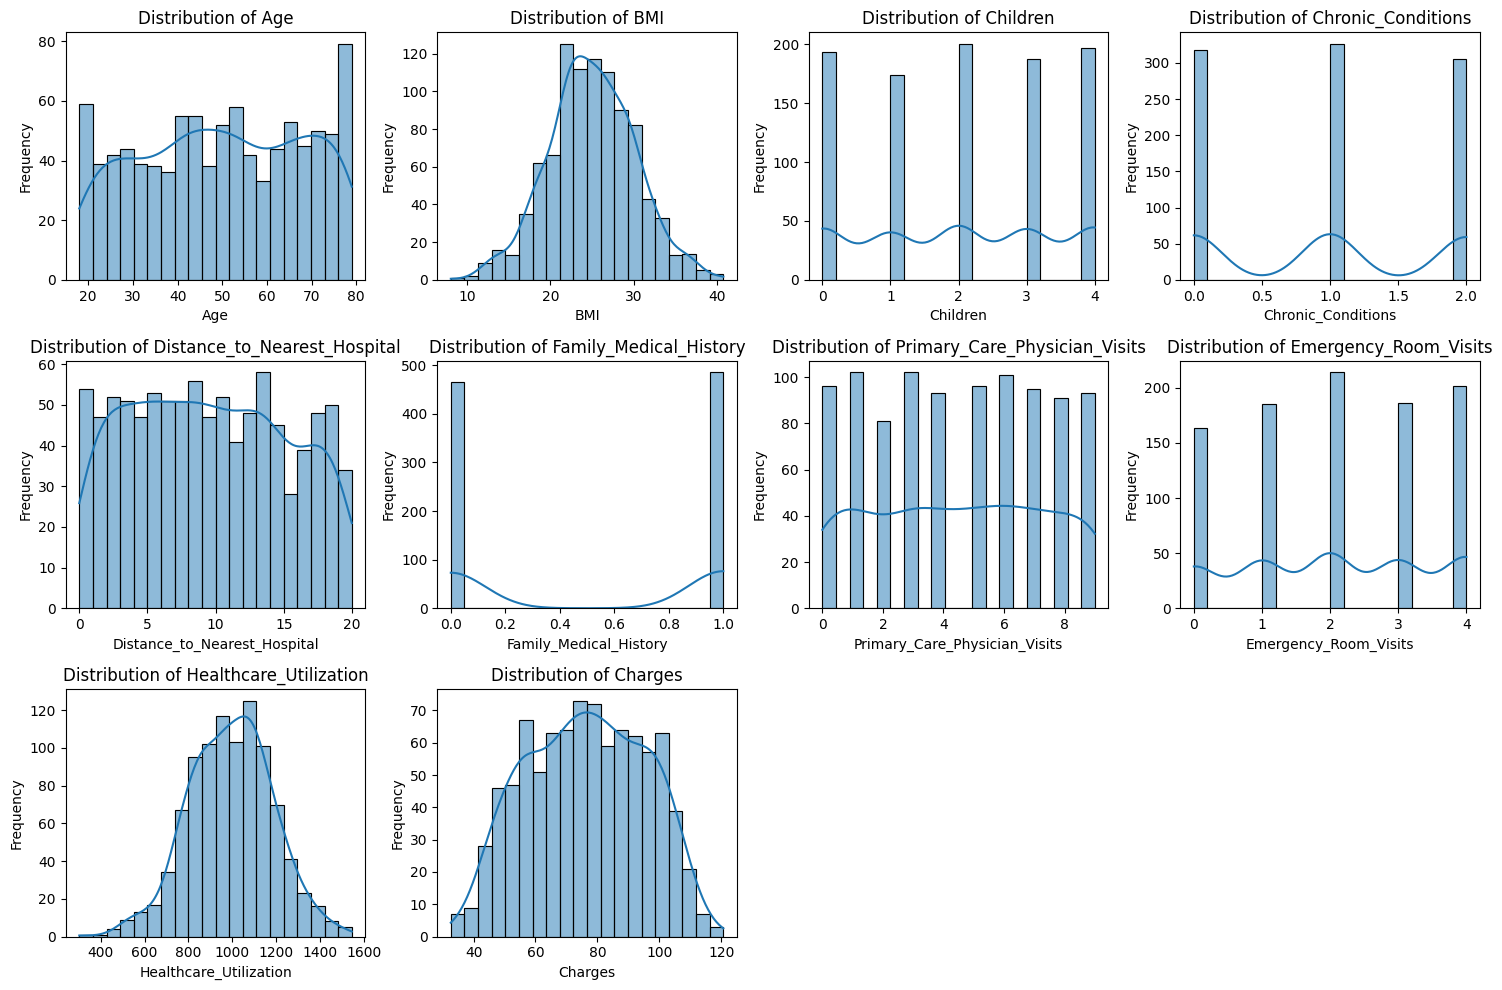

In [25]:
plt.figure(figsize=(15, 10))
for i, column_name in enumerate(numerical_data, 1):
    plt.subplot(3, 4, i)  # Adjusted the subplotnumerical_data layout to accommodate all columns
    sns.histplot(data=df, x=column_name, kde=True, bins=20)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Filling the Null Values in the columns

#### SimpleImputer class from the sklearn.impute module. This class is used to impute (fill in) missing values in datasets.It is initialized with a strategy for imputing missing values. In this case, the strategy chosen is 'mean', which means missing values will be replaced with the mean of the non-missing values in each column.

In [26]:
### Importing the Sklearn Library

In [27]:

from sklearn.impute import SimpleImputer


In [28]:

numerical_data = df.select_dtypes(include=['number']).columns
categorical_data = df.select_dtypes(include=['object']).columns        # Assuming df is dataframe 

numerical_imputer = SimpleImputer(strategy='mean')                     # Imputer for numerical data

categorical_imputer = SimpleImputer(strategy='most_frequent')          # Imputer for categorical data

                                                                          
df[numerical_data] = numerical_imputer.fit_transform(df[numerical_data])  # Fit and transform the numerical data


df[categorical_data] = categorical_imputer.fit_transform(df[categorical_data])  # Fit and transform the categorical data


#### Checking the Missing Values After Imputation

In [33]:
df.isnull().sum()


Age                              0
Sex                              0
BMI                              0
Children                         0
Smoker                           0
Region                           0
Occupation                       0
Exercise_Frequency               0
Chronic_Conditions               0
Insurance_Plan_Type              0
Marital_Status                   0
Distance_to_Nearest_Hospital     0
Income_Level                     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Mental_Health_Status             0
Prescription_Medication_Usage    0
Employment_Status                0
Education_Level                  0
Dietary_Habits                   0
Alcohol_Consumption              0
Sleep_Quality                    0
Stress_Level                     0
Medication_Adherence             0
Physical_Activity                0
Access_to_Healthcare             0
Social_Support                   0
Environmental_Factors            0
Genetic_Predispositi

#### Unique Values Count After Impute the null values

In [40]:
categorical_columns = ['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
                       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
                       'Mental_Health_Status', 'Prescription_Medication_Usage',
                       'Employment_Status', 'Education_Level', 'Dietary_Habits',
                       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
                       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
                       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
                       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine']

for column in categorical_columns:
    if column in df.columns:
        print(f"Column: {column}")
        print(df[column].value_counts())
        print("\n")
    else:
        print(f"Column {column}")

Column: Sex
Sex
Male      546
Female    454
Name: count, dtype: int64


Column: Smoker
Smoker
No     524
Yes    476
Name: count, dtype: int64


Column: Region
Region
East     296
West     247
South    234
North    223
Name: count, dtype: int64


Column: Occupation
Occupation
Other           377
Blue Collar     313
White Collar    310
Name: count, dtype: int64


Column: Exercise_Frequency
Exercise_Frequency
Weekly     320
Daily      236
Rarely     233
Monthly    211
Name: count, dtype: int64


Column: Insurance_Plan_Type
Insurance_Plan_Type
Bronze    377
Silver    320
Gold      303
Name: count, dtype: int64


Column: Marital_Status
Marital_Status
Married     379
Single      326
Divorced    295
Name: count, dtype: int64


Column: Income_Level
Income_Level
Low       379
High      327
Medium    294
Name: count, dtype: int64


Column: Mental_Health_Status
Mental_Health_Status
Fair    380
Good    325
Poor    295
Name: count, dtype: int64


Column: Prescription_Medication_Usage
Prescription_M

## Relationships and Visualizations between the Columns

In [41]:
region_count=df["Region"].value_counts()
region_count

Region
East     296
West     247
South    234
North    223
Name: count, dtype: int64

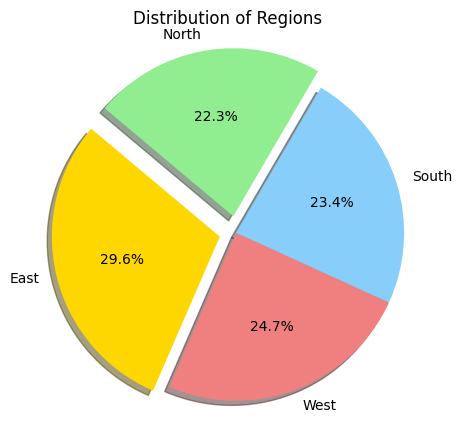

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

# Define custom colors
custom_colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

plt.pie(region_count, labels=region_count.index, autopct='%1.1f%%', startangle=140, shadow=True, explode=(0.1, 0, 0, 0.1), colors=custom_colors)

plt.title('Distribution of Regions')
plt.axis('equal') 
plt.show()


### Scatter Plot Visualisation Of Numerical Datas

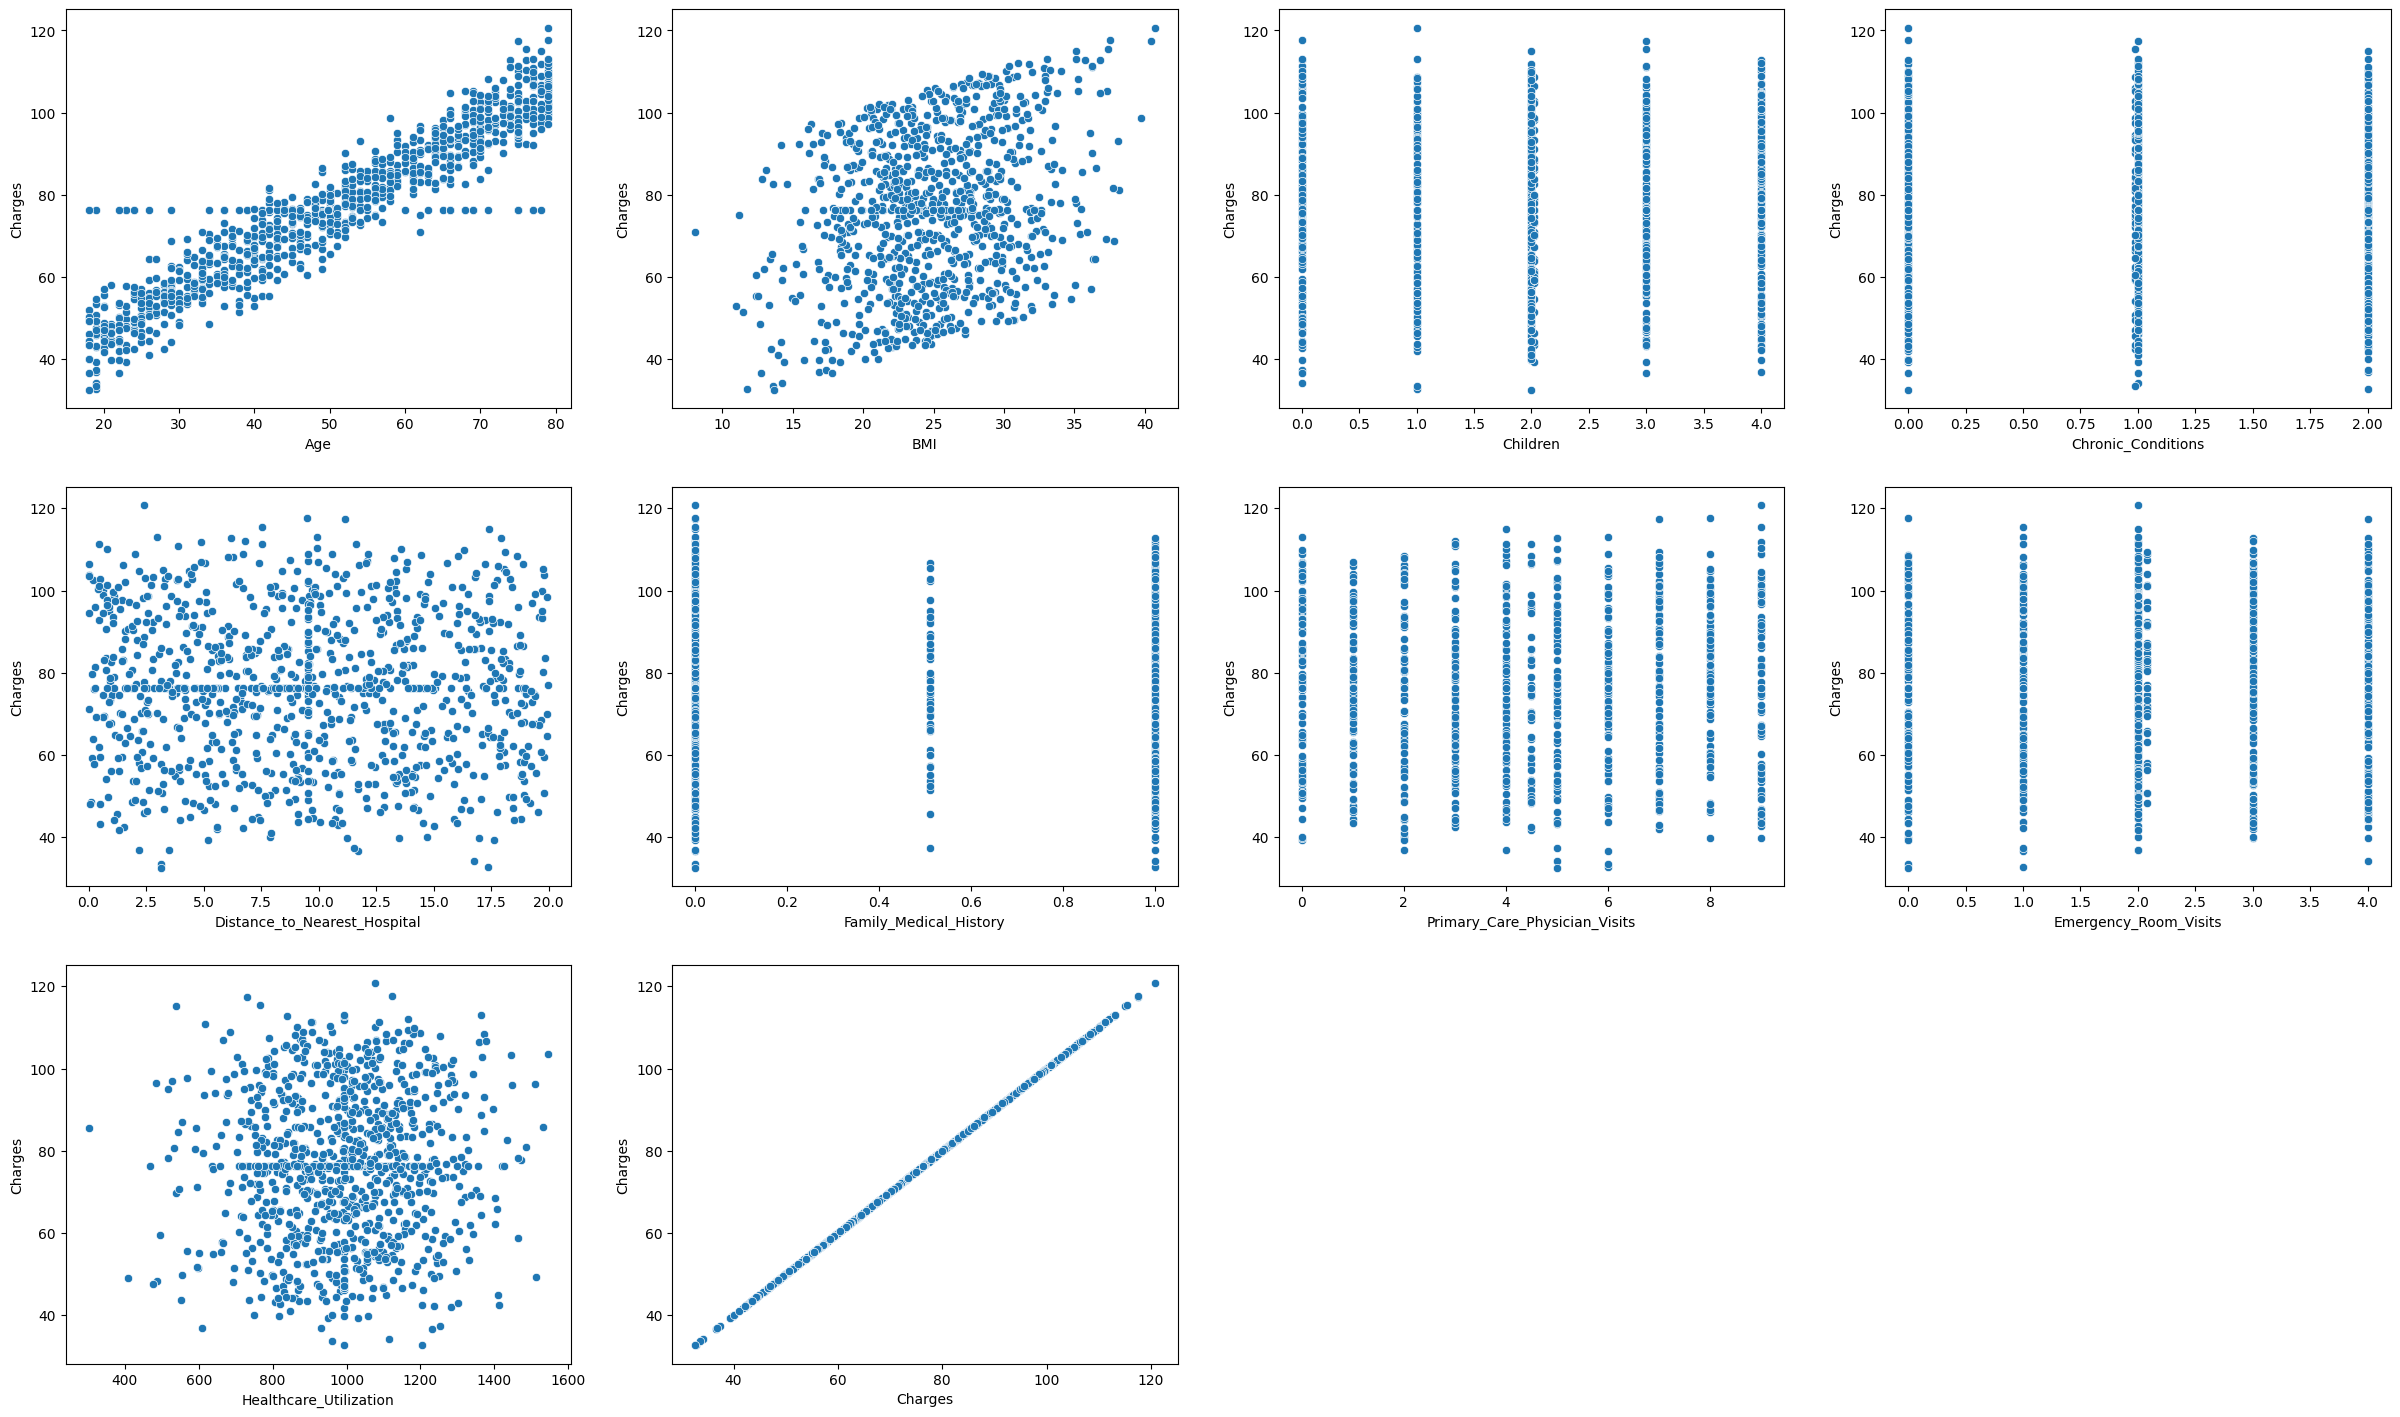

In [44]:
fig = plt.figure(figsize=(30,30))
counter = 0

for col in numerical_data:
    fig.add_subplot(5,4,counter+1)
    sns.scatterplot(data=df,x=col,y='Charges')
    plt.xlabel(col)
    counter = counter + 1

#### Displaying the Sex Count

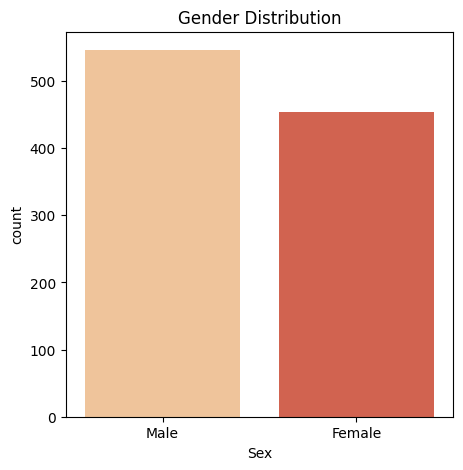

In [45]:
plt.figure(figsize=(5,5))

sns.countplot(x='Sex', data=df, hue='Sex', palette='OrRd')
plt.title('Gender Distribution')
plt.show()

## Outliers

#### Outliers are data points that significantly differ from the rest of the observations in a dataset. Identifying and understanding outliers is crucial in data analysis as they can skew statistical measures and lead to inaccurate interpretations of the data. In this analysis, we will explore the presence of outliers in our dataset and their potential impact on our results.
#### Outliers can be identified using various statistical methods such as z-scores, interquartile range (IQR), or visual inspection through box plots or scatter plots.
#### Depending on the nature of the analysis, outliers can be handled by either removing them, transforming them, or keeping them intact but analyzing them separately

#### Box_plot Visualization of Outliers

In [46]:
fig = plt.figure(figsize=(12,30))
counter = 0

for col in numerical_data:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

### Checking For Outliers

In [50]:

column_outliers = ['Age', 'BMI', 'Children', 'Chronic_Conditions',
                     'Distance_to_Nearest_Hospital', 'Family_Medical_History',
                     'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
                     'Healthcare_Utilization', 'Charges']

outliers = {}
for col in column_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

for col, values in outliers.items():
    print(f"Outliers in {col}:")
    print(values)


Outliers in Age:
Series([], Name: Age, dtype: float64)
Outliers in BMI:
7      11.43755
22     11.76374
157    37.82029
231    40.47025
245    39.73106
368    40.70983
521    38.14606
529     8.05786
697    38.12543
757    10.96891
852    11.20201
Name: BMI, dtype: float64
Outliers in Children:
Series([], Name: Children, dtype: float64)
Outliers in Chronic_Conditions:
Series([], Name: Chronic_Conditions, dtype: float64)
Outliers in Distance_to_Nearest_Hospital:
Series([], Name: Distance_to_Nearest_Hospital, dtype: float64)
Outliers in Family_Medical_History:
Series([], Name: Family_Medical_History, dtype: float64)
Outliers in Primary_Care_Physician_Visits:
Series([], Name: Primary_Care_Physician_Visits, dtype: float64)
Outliers in Emergency_Room_Visits:
Series([], Name: Emergency_Room_Visits, dtype: float64)
Outliers in Healthcare_Utilization:
211     408.4949
222     486.3093
309    1531.9990
344     302.0440
449    1509.4680
553     484.0518
711    1512.7000
902     476.1337
903    1

#### In the Data frame we Have column named "BMI and "Healthcare_Utilization",Have outliers

In [71]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

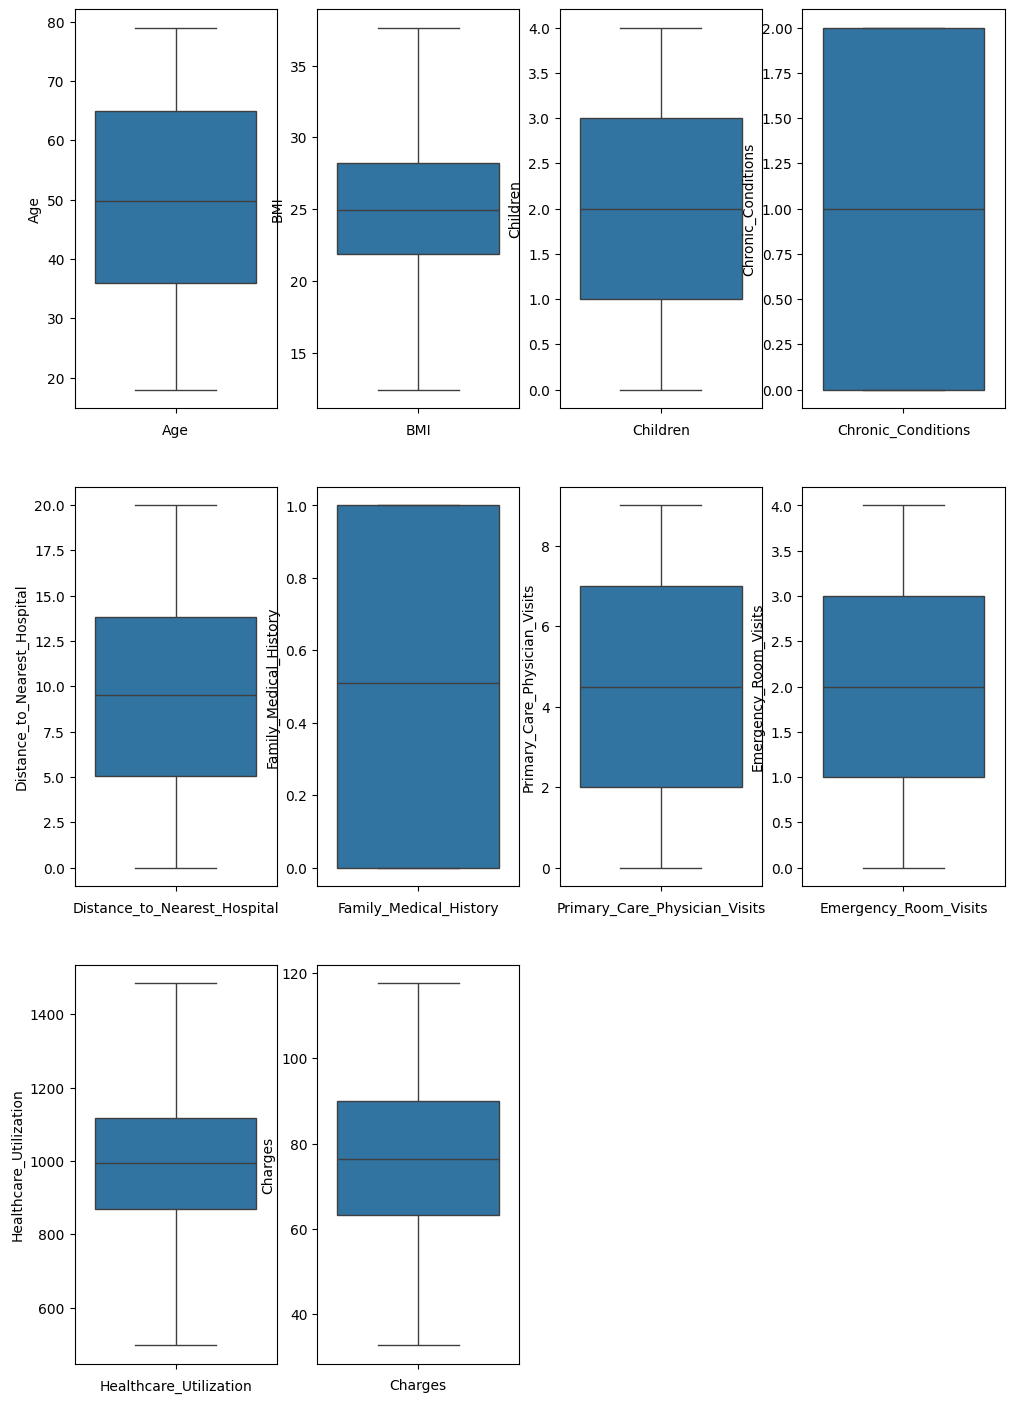

In [72]:
fig = plt.figure(figsize=(12,30))
counter = 0

for col in numerical_data:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

### Age Vs Charges

In [73]:
plt.figure(figsize=(30,9))
plt.title('Age vs Charges')

sns.barplot(x='Age',y='Charges',data=df, color='skyblue')
plt.show()

### Distribution Of Age 

In [74]:
plt.figure(figsize=(12,5))
sns.displot(df['Age'], kind='kde')
plt.show()

<Figure size 1200x500 with 0 Axes>

### Age Vs Charge

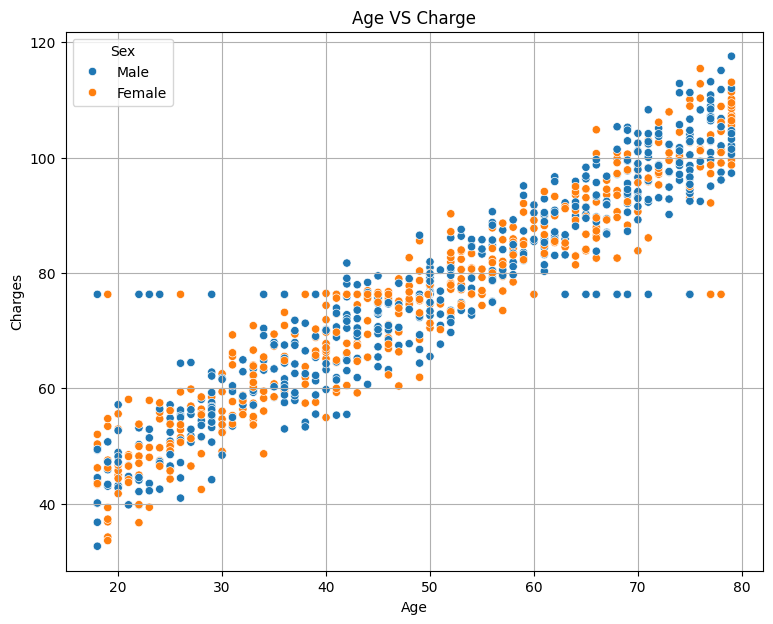

In [76]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='Age',y='Charges',hue='Sex',data=df,color='blue', alpha=1)
plt.title('Age VS Charge')
plt.grid(True)
plt.show()

### Age Vs BMI

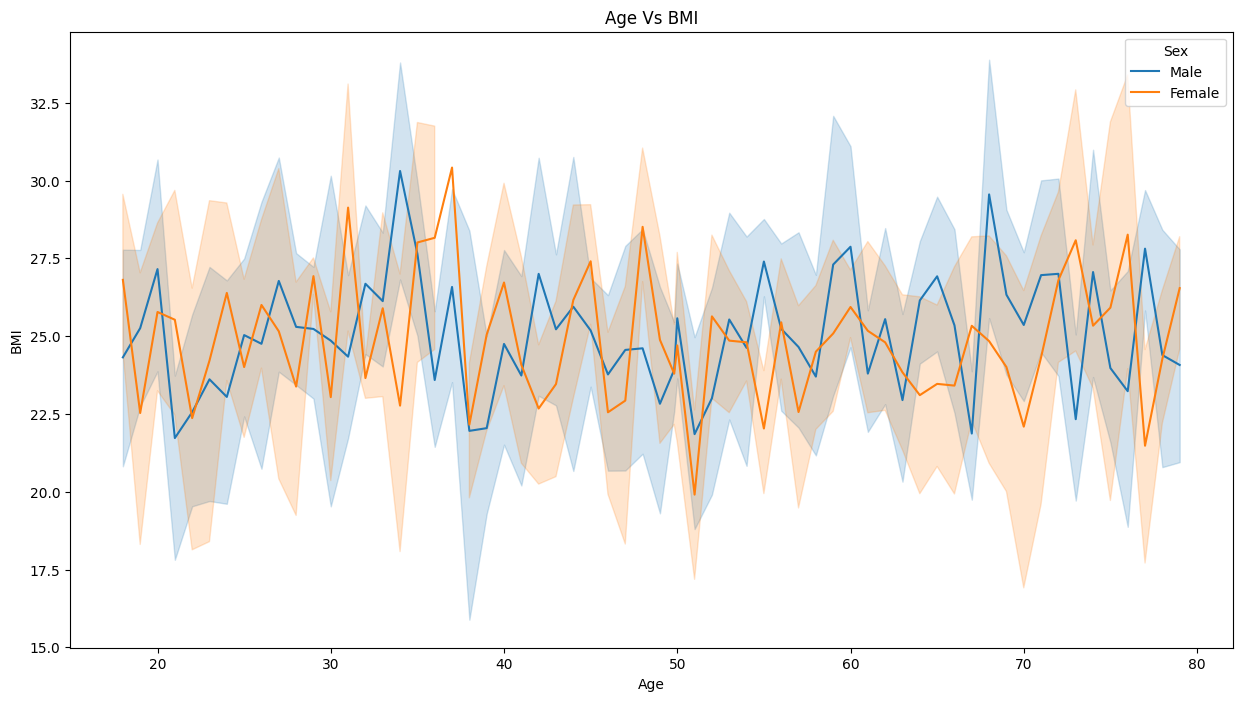

In [77]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Age', y='BMI',hue='Sex', data=df)
plt.title('Age Vs BMI')
plt.show()

### Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres.
The BMI is a convenient rule of thumb used to broadly categorize a person as underweight, normal weight, overweight, or obese based on tissue mass (muscle, fat, and bone) and height. Major adult BMI classifications are underweight (under 18.5 kg/m2), normal weight (18.5 to 24.9), overweight (25 to 29.9), and obese (30 or more). When used to predict an individual's health, rather than as a statistical measurement for groups, the BMI has limitations that can make it less useful than some of the alternatives, especially when applied to individuals with abdominal obesity, short stature, or unusually high muscle mass.

### BMI Vs Charges

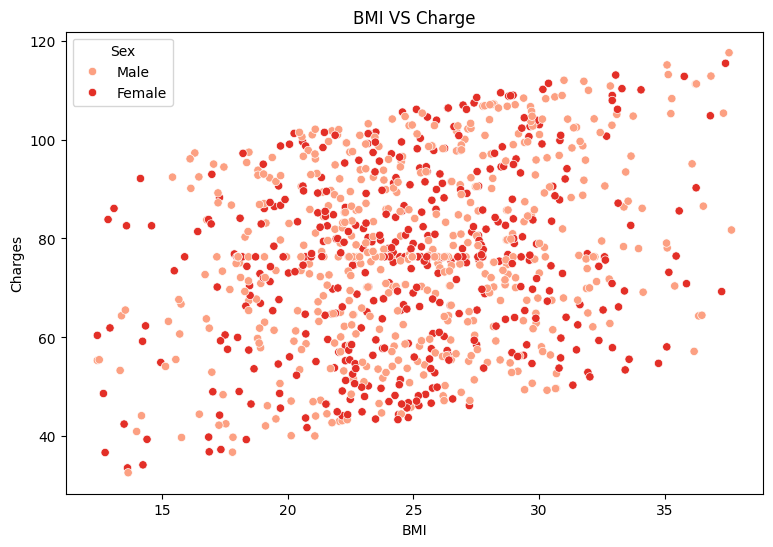

In [81]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='BMI',y='Charges',hue='Sex',data=df,palette='Reds')
plt.title('BMI VS Charge')
plt.show()

### Age Vs Insurance Plan

In [82]:
sns.boxplot(x='Insurance_Plan_Type', y='Age', data=df)
plt.title('Age Distribution by Insurance Plan Type')
plt.show()

### Smoker

### Smoking can cause many diseases and health conditions, including:
### Lung disease
Smoking can damage the airways and alveoli in the lungs, causing lung diseases such as COPD, emphysema, and chronic bronchitis. Smoking is also the cause of most lung cancers.

### Cancer
Cigarette smoke contains over 5,000 chemicals, at least 70 of which can cause cancer. When smoking, these chemicals damage DNA, including parts that protect against cancer. Smoking can cause cancer in the mouth, throat, esophagus, stomach, colon, rectum, liver, pancreas, voicebox, lung, trachea, bronchus, kidney, urinary bladder, and cervix.

### Other diseases
Smoking can cause heart disease, stroke, diabetes, tuberculosis, certain eye diseases, and problems with the immune system, including rheumatoid arthritis

### Smoker Count Based On Gender

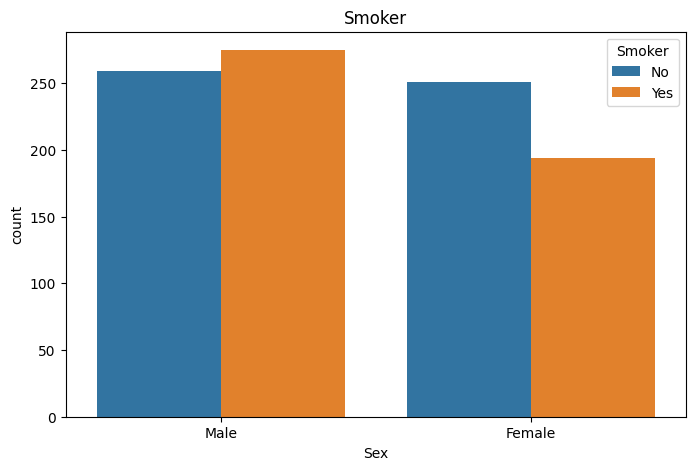

In [83]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', data=df,hue='Smoker')
plt.title('Smoker')
plt.show()

### Count Of People Smoke

In [84]:
gender_smoker_count = df.groupby(['Sex', 'Smoker']).size().reset_index(name='Count')
gender_smoker_count

Sex Smoker  Count
0  Female     No    251
1  Female    Yes    194
2    Male     No    259
3    Male    Yes    275

### Gender Based Total Count of Smoking Habit

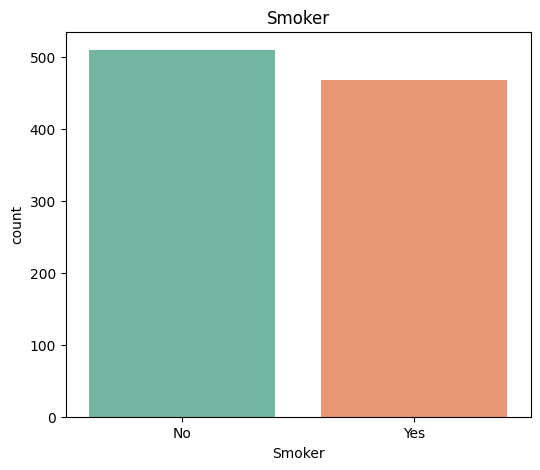

In [85]:
plt.figure(figsize=(6,5))
sns.countplot(x='Smoker', data=df,hue='Smoker',palette="Set2")
plt.title('Smoker')
plt.show()

### Description
The bar plot above illustrates the count of smokers and non-smokers categorized by gender. Each bar represents the total count of individuals belonging to a particular gender, with separate segments for smokers and non-smokers.

From the Analysis we can find that Female having the highest count of smoking habit
According to the National Library of Medicine, smokers pay 30–40% more for health insurance than non-smokers. However, some say that smokers can pay almost double the premium of non-smokers.

Insurance companies can charge smokers up to 50% more than non-smokers through a tobacco surcharge, which is called tobacco rating. The difference in premium depends on the frequency of smoking, with higher premiums for those who smoke more. Compulsive smokers may be rejected for health insurance applications

In [86]:
categorical_data 

Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine'],
      dtype='object')

### Smoking Habit based on Occupation

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', hue='Smoker', data=df)
plt.title('Smoker vs. Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#### Based on the dataset and visualization, it appears that there is a notable correlation between occupation and smoking habits, particularly with blue-collar jobs exhibiting a higher rate of smokers.
#### Blue-collar jobs typically involve manual labor and are often associated with industries such as manufacturing, construction, transportation, and maintenance. These occupations often require physical exertion and may involve working in environments where smoking is more prevalent, such as outdoor work sites or manufacturing facilities.
#### Higher Stress Levels: Many blue-collar jobs involve physically demanding tasks and may be accompanied by high-stress levels. Smoking is sometimes used as a coping mechanism for stress, and individuals in high-stress occupations may be more likely to smoke as a way to alleviate tension or relax during breaks.
#### Based on the dataset, i observed a trend where students have a higher smoking rate compared to individuals in other occupations.
#### Academic pressure and social dynamics in educational institutions could also be factors contributing to increased smoking habits among students.For some students, smoking might be perceived as a form of experimentation or a way to rebel against societal norms.
#### Understanding the underlying reasons behind high smoking rates among students can help in designing effective intervention strategies aimed at reducing smoking prevalence in this demographic group.
#### Highlighting the lower smoking rates among individuals in other occupations can serve as a positive example and encourage students to adopt healthier behaviors as they transition into the workforce.

### Smoker Vs Insurance Charges

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='Smoker', ylabel='Charges'>

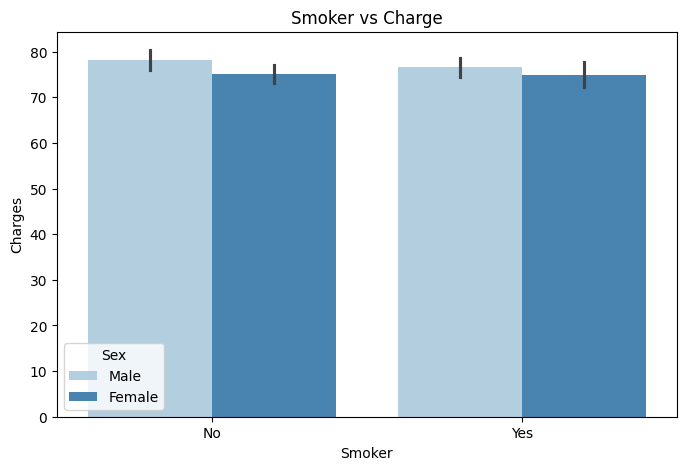

In [88]:
plt.figure(figsize=(8,5))
plt.title('Smoker vs Charge')
sns.barplot(x='Smoker',y='Charges',data=df,palette='Blues',hue='Sex')

### This box plot gives us a very clear trend that the smokers are likely to pay more than the non-smokers. But let's discover even more.

### Charges Vs BMI

In [89]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='BMI', y='Charges', hue='Smoker')
plt.axvline(x=18.5, color='#F72585', linestyle = '--')  # under 18.5 - underweight, between 18.5~24.9 - Normal
plt.axvline(x=25, color = '#F72585', linestyle = '--')  # between 25~29.9 - Overweight
plt.axvline(x=30, color = '#3A0CA3', linestyle = '--')     # Over 30 - Obese
plt.title("Charges by BMI")
plt.xlabel("BMI (kg/m^2)")
plt.ylabel("Charge")
plt.show()

## Alcohol Consumption

#### Alcohol consumption influences health insurance rates by increasing the likelihood of health issues, leading insurers to perceive consumers as higher risks.If your insurance provider learns you regularly consume alcohol, the insurer might deny or reject your claim. This is because greater alcohol use may result in health risks that your insurer may not be willing to pay
#### The Centre for Disease Control and Prevention (CDC) has established a specific threshold for alcohol consumption, defining any amount exceeding it as excessive drinking. In India, the prescribed permissible blood alcohol content is set at 0.03% per 100 ml of blood, equivalent to 30mg of alcohol per 100 ml of blood.

In [91]:
plt.figure(figsize=(15,5))
sns.countplot(x='Alcohol_Consumption',hue='Alcohol_Consumption', data=df,palette='cubehelix')
plt.title('Alcohol_Consumption')
plt.show()

#### Count of Alcohol Consumption

In [92]:
value_counts = df['Alcohol_Consumption'].value_counts()
value_counts

Alcohol_Consumption
Heavy       679
Moderate    300
Name: count, dtype: int64

#### The dataset contains counts of individuals based on their alcohol consumption habits. 
There are three categories: Never, Regularly, and Occasionally. 
The distribution shows that the majority of individuals either never consume alcohol or consume it occasionally. 
However, there is a sizable portion that consumes alcohol regularly. 
This information could be valuable for public health initiatives, targeting interventions towards different consumption groups.
 
#### Never:

This group comprises the largest number of individuals, indicating that a significant portion of the sample population abstains from alcohol consumption altogether.

#### Regularly:

While slightly fewer in number compared to the "Never" category, this group still constitutes a substantial portion of the sample and indicates a consistent alcohol consumption pattern.

#### Occasionally:

This group has the fewest individuals among the three categories but still represents a significant portion of the sample. They consume alcohol infrequently compared to the other two groups.s
The high number of individuals who never consume alcohol suggests a notable portion of the population either abstains due to personal, religious, or health-related reasons, or simply chooses not to drink.
The relatively large number of individuals who consume alcohol regularly indicates that a significant portion of the population has incorporated alcohol into their routine lifestyle.
The presence of individuals who consume alcohol occasionally suggests a diversity in drinking habits within the sample population, with some choosing to indulge occasionally rather than regularly..)

# Mental Health Status

####  Mental Health Status :
Column in the dataset likely contains information regarding the mental well-being or psychological state of individuals. This column can provide insights into various aspects of mental health, including but not limited to

#### Good:
Individuals categorized under "good" mental health status typically exhibit positive psychological well-being and coping mechanisms. They often experience a sense of balance, resilience, and the ability to manage stressors effectively. They may display a positive outlook on life, feel satisfied with their relationships and work, and generally enjoy good emotional stability. They are likely to have healthy coping strategies, maintain social connections, and engage in activities that promote mental well-being.

#### Fair: 
Individuals categorized under "fair" mental health status may experience occasional challenges or fluctuations in their mental well-being. They may have periods of stress, mild anxiety, or low mood, but these feelings are generally manageable and do not significantly impair their daily functioning. They may seek support from friends, family, or mental health professionals during difficult times and may benefit from practicing self-care techniques to maintain balance and resilience.

#### Poor: 
Individuals categorized under "poor" mental health status may experience significant distress, dysfunction, or impairment in various areas of their lives due to mental health issues. They may struggle with persistent anxiety, depression, mood swings, or other mental health disorders that interfere with their ability to function optimally at work, school, or in relationships. They may have difficulty coping with stressors, maintaining social connections, or engaging in activities they once enjoyed. They may require professional intervention, such as therapy, medication, or other forms of support, to address their mental health challenges effectively.

This description provides a nuanced understanding of the different levels of mental health status and can help in interpreting and analyzing the data effectively.

## Encoding the Categorical Values

#### Displaying unique values in Category Data

In [93]:
for col in categorical_data:
    print(col,df[col].unique())

Sex ['Male' 'Female']
Smoker ['No' 'Yes']
Region ['East' 'West' 'North' 'South']
Occupation ['White Collar' 'Blue Collar' 'Other']
Exercise_Frequency ['Daily' 'Monthly' 'Rarely' 'Weekly']
Insurance_Plan_Type ['Gold' 'Bronze' 'Silver']
Marital_Status ['Married' 'Single' 'Divorced']
Income_Level ['Medium' 'High' 'Low']
Mental_Health_Status ['Good' 'Fair' 'Poor']
Prescription_Medication_Usage ['Yes' 'No']
Employment_Status ['Self-Employed' 'Unemployed' 'Employed']
Education_Level ['Graduate' 'College' 'High School']
Dietary_Habits ['Unhealthy' 'Healthy']
Alcohol_Consumption ['Moderate' 'Heavy']
Sleep_Quality ['Good' 'Poor']
Stress_Level ['High' 'Medium' 'Low']
Medication_Adherence ['No' 'Yes']
Physical_Activity ['Active' 'Inactive']
Access_to_Healthcare ['Difficult' 'Easy']
Social_Support ['Weak' 'Strong']
Environmental_Factors ['Good' 'Poor']
Genetic_Predisposition ['Present' 'Absent']
Health_Literacy_Level ['High' 'Low']
Comorbidities ['Yes' 'No']
Access_to_Telemedicine ['Unavailable' '

## Label Encoding

### Label Encoding: Useful for ordinal categorical variables where the order matters

### Income_Level, Stress_Level

In [109]:
## Importing the sklearn Library
from sklearn.preprocessing import LabelEncoder

In [112]:
ordinal_columns = ['Income_Level', 'Stress_Level']
label_encoders = {}

for col in ordinal_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


## One-Hot Encoding

### Useful for nominal categorical variables where the order doesn’t matter 

In [106]:
nominal_columns = ['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency', 'Insurance_Plan_Type',
                   'Marital_Status', 'Mental_Health_Status', 'Prescription_Medication_Usage', 'Employment_Status',
                    'Dietary_Habits', 'Alcohol_Consumption', 'Sleep_Quality', 
                   'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare', 'Social_Support', 
                   'Environmental_Factors', 'Genetic_Predisposition', 'Health_Literacy_Level', 'Comorbidities', 
                   'Access_to_Telemedicine']

existing_columns = [col for col in nominal_columns if col in df.columns]

                                                  
df = pd.get_dummies(df, columns=existing_columns)          # Apply pd.get_dummies to the DataFrame with the corrected list of columns

print(df)

      Age       BMI  Children  Chronic_Conditions  \
0    56.0  26.78763       0.0                 2.0   
1    69.0  22.06365       4.0                 2.0   
2    46.0  24.03610       2.0                 1.0   
3    32.0  24.22982       2.0                 2.0   
4    60.0  31.78428       0.0                 0.0   
..    ...       ...       ...                 ...   
994  71.0  13.07822       1.0                 1.0   
995  18.0  17.79434       0.0                 1.0   
996  35.0  22.53824       1.0                 1.0   
997  49.0  18.28548       4.0                 2.0   
998  64.0  22.09611       2.0                 0.0   

     Distance_to_Nearest_Hospital  Income_Level  Family_Medical_History  \
0                       12.233110             2                     0.0   
1                       11.314950             0                     0.0   
2                       14.294050             2                     1.0   
3                       18.754090             0                

### Checking the Null values

In [117]:
null_rows = df.isnull().any(axis=1).sum()
print(null_rows)


0


## Correlation 

###  Description of Correlation Matrix

The correlation matrix visualized below represents the pairwise correlations between the numerical features in the dataset. Each cell in the matrix contains a correlation coefficient, ranging from -1 to 1, indicating the strength and direction of the linear relationship between two variables.

### Interpretation of Correlation Coefficients:

- **Positive Correlation (0 to 1)**: A coefficient close to 1 indicates a strong positive linear relationship, meaning as one variable increases, the other tends to increase as well.
  
- **Negative Correlation (-1 to 0)**: A coefficient close to -1 indicates a strong negative linear relationship, meaning as one variable increases, the other tends to decrease.
  
- **No Correlation (0)**: A coefficient close to 0 suggests no linear relationship between the variables.
  
- **Strength of Correlation**: The magnitude of the correlation coefficient indicates the strength of the relationship, with values closer to 1 or -1 representing stronger relationships.

### Interpretation of Heatmap:

The heatmap visualization provides a graphical representation of the correlation matrix, with colors indicating the strength and direction of the correlation. Warmer colors (shades of red) represent positive correlations, while cooler colors (shades of blue) represent negative correlations. The intensity of the color reflects the magnitude of the correlation coefficient.



In [122]:
correlation_matrix = df.corr()
correlation_matrix

Age       BMI  Children  \
Age                                 1.000000  0.023168  0.028767   
BMI                                 0.023168  1.000000 -0.000585   
Children                            0.028767 -0.000585  1.000000   
Chronic_Conditions                 -0.049410  0.045693 -0.029529   
Distance_to_Nearest_Hospital       -0.022569 -0.021804  0.004017   
...                                      ...       ...       ...   
Health_Literacy_Level_Low           0.014693 -0.001480  0.019848   
Comorbidities_No                    0.027959  0.016731  0.037514   
Comorbidities_Yes                  -0.027959 -0.016731 -0.037514   
Access_to_Telemedicine_Available    0.046056 -0.028018  0.017321   
Access_to_Telemedicine_Unavailable -0.046056  0.028018 -0.017321   

                                    Chronic_Conditions  \
Age                                          -0.049410   
BMI                                           0.045693   
Children                                     -0.029529   
Chronic_Conditions                            1.000000   
Distance_to_Nearest_Hospital                  0.009277   
...                                                ...   
Health_Literacy_Level_Low                    -0.026153   
Comorbidities_No                             -0.036454   
Comorbidities_Yes                             0.036454   
Access_to_Telemedicine_Available             -0.078252   
Access_to_Telemedicine_Unavailable            0.078252   

                                    Distance_to_Nearest_Hospital  \
Age                                                    -0.022569   
BMI                                                    -0.021804   
Children                                                0.004017   
Chronic_Conditions                                      0.009277   
Distance_to_Nearest_Hospital                            1.000000   
...                                                          ...   
Health_Literacy_Level_Low                              -0.005490   
Comorbidities_No                                        0.001453   
Comorbidities_Yes                                      -0.001453   
Access_to_Telemedicine_Available                        0.028567   
Access_to_Telemedicine_Unavailable                     -0.028567   

                                    Income_Level  Family_Medical_History  \
Age                                     0.059598               -0.053132   
BMI                                     0.005344               -0.004783   
Children                               -0.023957                0.037602   
Chronic_Conditions                     -0.056602                0.020154   
Distance_to_Nearest_Hospital           -0.014665               -0.017893   
...                                          ...                     ...   
Health_Literacy_Level_Low              -0.004394               -0.046823   
Comorbidities_No                        0.021885                0.003726   
Comorbidities_Yes                      -0.021885               -0.003726   
Access_to_Telemedicine_Available       -0.066356               -0.018118   
Access_to_Telemedicine_Unavailable      0.066356                0.018118   

                                    Primary_Care_Physician_Visits  \
Age                                                      0.051984   
BMI                                                      0.051733   
Children                                                 0.005247   
Chronic_Conditions                                      -0.014305   
Distance_to_Nearest_Hospital                            -0.045578   
...                                                           ...   
Health_Literacy_Level_Low                               -0.023482   
Comorbidities_No                                         0.014093   
Comorbidities_Yes                                       -0.014093   
Access_to_Telemedicine_Available                        -0.008983   
Access_to_Telemedicine_Unavailable    

In [123]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Feature Scaling

In [126]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)                           # Fit and transform the data

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)          # Create a new DataFrame with the scaled data



In [129]:
df.head()

Age       BMI  Children  Chronic_Conditions  Distance_to_Nearest_Hospital  \
0  56.0  26.78763       0.0                 2.0                      12.23311   
1  69.0  22.06365       4.0                 2.0                      11.31495   
2  46.0  24.03610       2.0                 1.0                      14.29405   
3  32.0  24.22982       2.0                 2.0                      18.75409   
4  60.0  31.78428       0.0                 0.0                      18.24509   

   Income_Level  Family_Medical_History  Primary_Care_Physician_Visits  \
0             2                     0.0                            6.0   
1             0                     0.0                            2.0   
2             2                     1.0                            9.0   
3             0                     0.0                            2.0   
4             1                     1.0                            2.0   

   Stress_Level  Emergency_Room_Visits  ...  Environmental_Factors_Good  \
0             0                    4.0  ...                        True   
1             2                    2.0  ...                        True   
2             0                    2.0  ...                        True   
3             0                    0.0  ...                        True   
4             2                    2.0  ...                       False   

   Environmental_Factors_Poor  Genetic_Predisposition_Absent  \
0                       False                          False   
1                       False                           True   
2                       False                           True   
3                       False                          False   
4                        True                          False   

   Genetic_Predisposition_Present  Health_Literacy_Level_High  \
0                            True                        True   
1                           False                        True   
2                           False                       False   
3                            True                       False   
4                            True                       False   

   Health_Literacy_Level_Low  Comorbidities_No  Comorbidities_Yes  \
0                      False             False               True   
1                      False             False               True   
2                       True              True              False   
3                       True              True              False   
4                       True             False               True   

   Access_to_Telemedicine_Available  Access_to_Telemedicine_Unavailable  
0                             False                                True  
1                              True                               False  
2                             False                                True  
3                              True                               False  
4                              True                               False  

[5 rows x 68 columns]

## Feature Selection 

#### Importing the Sklearn Library

In [157]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### Splitting the Dataset For Train test

In [135]:
X = df.drop(columns=['Charges'])                # Features
y = df['Charges']                               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Selection using SelectKBest for Regression Analysis

In [138]:

k_best = SelectKBest(score_func=f_regression, k=5)

X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)



## 1.Linear Regression

In [139]:
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = model.predict(X_test_selected)


Mean Squared Error: 12.15314042492314
Mean Squared Error: 12.15314042492314
R-squared Score: 0.9617437198831048
Root Mean Squared Error (RMSE): 3.486135457053145


### Evaluation Of Linear Regression

In [166]:

mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("Linear Regression:")
print("Linear Regression_Mean Squared_Error:", mse)
print("Linear Regression_Mean_Absolute_Error:", mae)
print("Linear Regression_Root Mean Squared Error (RMSE):", rmse)
print("Linear Regression_R-Squared:", r2)


Linear Regression:
Linear Regression_Mean Squared_Error: 6.347794768688453
Linear Regression_Mean_Absolute_Error: 1.6228123959576661
Linear Regression_Root Mean Squared Error (RMSE): 2.51948303599934
Linear Regression_R-Squared: 0.9800180853421643


## 2. RandomForestRegressor

In [148]:
# Model Selection & Training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

### Evaluation Of RandomForestRegressor

In [149]:
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RandomForestRegressor:")
print("RandomForestRegressor_Mean_Squared Error:", mse)
print("RandomForestRegressor_Mean_Absolute_error:", mae)
print("RandomForestRegressor_Mean_R-Squared:", r2)

RandomForestRegressor:
RandomForestRegressor_Mean_Squared Error: 3.672776110121239
RandomForestRegressor_Mean_Absolute_error: 1.3403018995169496
RandomForestRegressor_Mean_R-Squared: 0.9884386465750619


## 3.SVR (Support Vector Regressor)

In [151]:
svr=SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

### Evaluation Of Support Vector Regressor

In [163]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr=mean_absolute_error(y_test, y_pred_svr)
r2_score_svr = r2_score(y_test, y_pred_svr)
                        
print("Support Vector Regressor:")
print("SVR_Mean_Squared_Error:", mse)
print("SVR_Mean_Absolute_Error:", mae)
print("SVR_R-squared_Score:",r2_score_svr)

Support Vector Regressor:
SVR_Mean_Squared_Error: 3.672776110121239
SVR_Mean_Absolute_Error: 1.3403018995169496
SVR_R-squared_Score: 0.034101256321860896


## 4.Decision Tree Regression

In [155]:
dtr = DecisionTreeRegressor()

# Train the model on the training data
dtr.fit(X_train, y_train)

# Predict on the test set
y_pred = dtr.predict(X_test)

### Evaluation Of Decision Tree Regressor

In [165]:
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred_svr)
                        
print("Decision Tree Regression:")
print("Decision Tree Regression:", mse)
print("Decision Tree Regression:", mae)
print("Decision Tree Regression:", r2)

Decision Tree Regression:
Decision Tree Regression: 6.347794768688453
Decision Tree Regression: 1.6228123959576661
Decision Tree Regression: 0.034101256321860896


## 5.GradientBoostingRegressor

In [160]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

### Evaluation Of GradientBoostingRegressor

In [161]:
mae_gb_regressor = mean_absolute_error(y_test, y_pred)
mse_gb_regressor = mean_squared_error(y_test, y_pred)

print("GradientBoostingRegressor:")
print("GradientBoostingRegressor_Mean Squared Error:", mse_gb_regressor)
print("GradientBoostingRegressor_Mean Absolute Error:", mae_gb_regressor)
print("GradientBoostingRegressor_R-squared_Score:", r2_score(y_test, y_pred))

GradientBoostingRegressor:
GradientBoostingRegressor_Mean Squared Error: 6.347794768688453
GradientBoostingRegressor_Mean Absolute Error: 1.6228123959576661
GradientBoostingRegressor_R-squared_Score: 0.9800180853421643


#### In this Dataset, i evaluated the performance of various regression models on the dataset. 
#### The models tested included Linear Regression, RandomForestRegressor, Support Vector Regressor (SVR),
#### Decision Tree Regression, and GradientBoostingRegressor. 

In [ ]:

 Model	             Mean Squared Error (MSE)	Mean Absolute Error (MAE)	Root Mean Squared Error (RMSE)	    R-Squared

Linear Regression		   	6.3478                 1.6228	                    0.9800                            0.9800
RandomForestRegressor		3.6728	               1.3403                       0.9800                            0.9884
Support Vector Regressor	3.6728			       1.3403                       0.0341                            0.0341
Decision Tree Regression	6.3478		           1.6228                       0.0341                            0.0341
GradientBoostingRegressor	6.3478			       1.6228                       0.9800                            0.9800


### .RandomForestRegressor 
Outperformed all other models in terms of Mean Squared Error (3.6728), Mean Absolute Error (1.3403), and R-Squared (0.9884). This indicates that it provided the most accurate predictions with the lowest error rates.

### .Support Vector Regressor (SVR) and Decision Tree Regression
Both exhibited an R-Squared value of 0.0341, which suggests that these models did not fit the data well and failed to capture the underlying patterns effectively.

### .Linear Regression and GradientBoostingRegressor 
Both showed an R-Squared value of 0.9800, indicating a strong fit to the data. However, Linear Regression had higher errors compared to the RandomForestRegressor.

### .Despite similar MSE and MAE 
Values between Linear Regression and GradientBoostingRegressor, the RandomForestRegressor still outperformed them both in overall accuracy and predictive power.

### Summary

The Random Forest Regressor outperformed all other models with the lowest Mean Squared Error and Mean Absolute Error, and the highest R-Squared score, indicating that it was the best model for our dataset. Both Linear Regression and Gradient Boosting Regressor performed well with similar metrics, but slightly lower than Random Forest. The Support Vector Regressor and Decision Tree Regression models performed poorly with much lower R-Squared scores, indicating they are not suitable for this dataset.

## Visualization of Scores

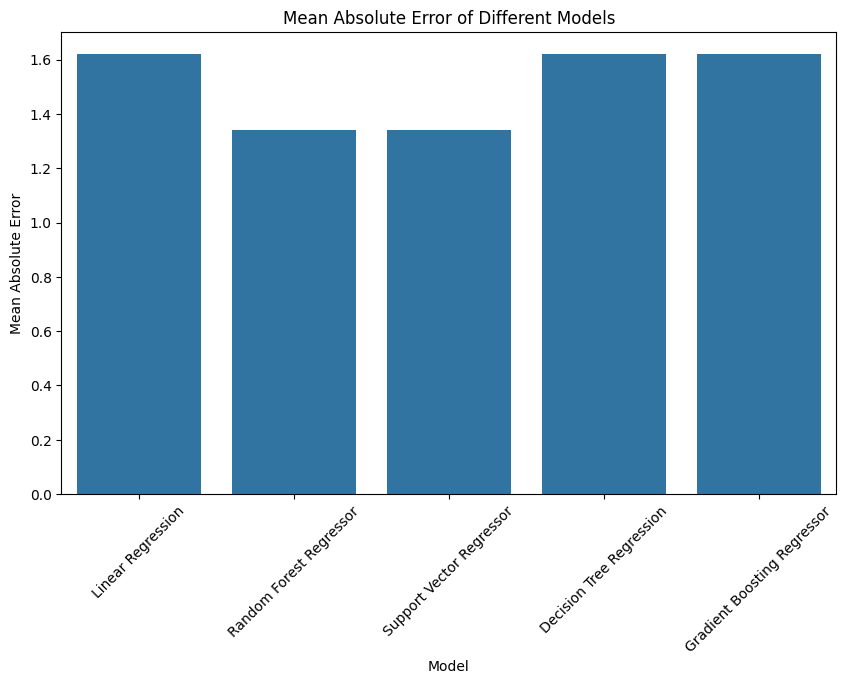

In [167]:

# Create a DataFrame with the model scores
data = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Support Vector Regressor', 'Decision Tree Regression', 'Gradient Boosting Regressor'],
    'Mean Squared Error': [6.35, 3.67, 3.67, 6.35, 6.35],
    'Mean Absolute Error': [1.62, 1.34, 1.34, 1.62, 1.62],
    'R-Squared': [0.98, 0.99, 0.03, 0.03, 0.98]
}

df = pd.DataFrame(data)

# Plotting Mean Squared Error
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Squared Error', data=df)
plt.title('Mean Squared Error of Different Models')
plt.xticks(rotation=45)
plt.show()

# Plotting Mean Absolute Error
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean Absolute Error', data=df)
plt.title('Mean Absolute Error of Different Models')
plt.xticks(rotation=45)
plt.show()

# Plotting R-Squared
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-Squared', data=df)
plt.title('R-Squared of Different Models')
plt.xticks(rotation=45)
plt.show()


### Conclusion
Based on the evaluation metrics, the RandomForestRegressor is the most effective model for our dataset, providing the highest accuracy and lowest error rates. Both Linear Regression and GradientBoostingRegressor also performed well but were slightly less accurate. The Support Vector Regressor and Decision Tree Regression models did not perform well, indicating they are not suitable for this particular dataset.

For future work, exploring hyperparameter tuning for the RandomForestRegressor and GradientBoostingRegressor could further improve their performance. Additionally, investigating other advanced models or ensemble methods might yield even better results.

### Model Selection:

#### Primary Recommendation:
Given its superior performance across all metrics, the RandomForestRegressor should be selected as the primary model for predicting the target variable. It provides the highest accuracy and lowest error rates.

#### Secondary Option: 
The Linear Regression model can be used as a simpler, interpretable alternative if computational efficiency is a priority and slight reduction in accuracy is acceptable.

### Model Monitoring and Maintenance:

#### Regular Updates:
Continuously monitor the model's performance over time. If new data becomes available, regularly retrain the model to ensure it remains accurate.

#### Performance Tracking:
Implement tracking of key metrics like MSE, MAE, RMSE, and R-squared on new data to detect any performance degradation early.